In [136]:
# Databricks notebook source
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
url = "https://raw.githubusercontent.com/BarbaraJoebstl/data_vis_for_data_engineers/main/Pokemon.csv"

In [138]:
df = pd.read_csv(url)

# Why do data engineers need this?

When you need to onboard a new data source, with a huge amount of data, it can be important to use data visualization to understand the data better.
The data analysis process is most of the times done in 5 steps:

1. **Extract** - Obtain the data.
2. **Clean** - Here we could use exploratory visuals.
3. **Explore** - Here we use exploratory visuals.
4. **Analyze** - Here we might use either exploratory or explanatory visuals.
5. **Share** - Here is where explanatory visuals live.

When we need to validate a new datasource, using data visualizations helps us understand the data faster and better.

# Types of data
To be able to choose an appropriate plot for a given measure, it is important to know what data you are dealing with.

## Qualitative aka categorical types

### Nominal qualitative data
Labels with no order or rank associated with the items itself. <br>
Examples: Gender, marital status, menu items

### Ordinal qualitative data
Labels that have an order or ranking. <br>
Examples: letter grades, rating

## Quantitative aka numeric types
### Discrete quantitative values
Numbers can not be split into smaller units <br>
Examples: Pages in a Book, number of trees in a park

### Continuous quantitative values
Numbers can be split in smaller units <br>
Examples: Height, Age, Income, Workhours


# Summary Statistics
## Numerical Data
- **Mean**: The average value.
- **Median**: The middle value when the data is sorted.
- **Mode**: The most frequently occurring value.
- **Variance/Standard Deviation**: Measures of spread or dispersion.
- **Range**: Difference between the maximum and minimum values.

## Categorical Data
- **Frequency**: The count of occurrences of each category. 
- **Mode**: The most frequent category.

# Visualizations 
You can get insights to a new data source very quick and also see connections between different datatypes easier.

Because when you only use the standard statistics to summarize your data, you will get the min, max, mean, median and mode, but this might be misleading in other aspects. Like it is shown in Anscombe's Quartet: the mean and deviation are always the same, but the data distribution is always different.

In data visualization, we have two types:
1. **Exploratory data visualization**: 

We use this to get insights about the data. It does not need to be visually appealing.

2. **Explanatory data visualization**: 

This visualizations need to be accurate, insightful and visually appealing as this is presented to the users.


 ## Chart Junk, Data Ink Ratio and Design Integrity
 ### Chart Junk
 To be able to read the information provided via plot without distraction, it is important to avoid chart junk. Like:
 - Heavy grid lines
 - Pictures in the visuals
 - Shades 
 - 3d components
 - Ornaments
 - Superfluous texts

 ### Data Ink Ratio
 The lower your chart junk in a visual is the higher the data ink ratio is. This just means the more "ink" in the visual is used to transport the message of the data, the better it is.

 ### Design Integrity
 The **Lie Factor** is calculated as:

 $$
 \text{Lie Factor} = \frac{\text{Size of effect shown in graphic}}{\text{Size of effect in data}}
 $$

 The delta stands for the difference. So it is the relative change shown in the graphic divided by the actual relative change in the data. Ideally it should be 1. If it is not, it means that there is some missmatch in the way the data is presented and the actual change.

 ![Image description](https://dev-to-uploads.s3.amazonaws.com/uploads/articles/1dzp2loid56sxw970la3.png)

 The number of pixels related to the largest image is 79,000 and 16,500 for the smallest. The percentage change is 27% to 12%. So, the lie factor is calculated as:

 $$
 \text{Lie Factor} = \frac{79000−16500/16500} {27−12/12}=3.03
 $$ 


 In the example above, taken from the wiki, the lie factor is 3, when comparing the pixels of each doctor, representing the numbers of doctors in California.

 ### Tidy data
 make sure you're data is cleaned properly and ready to use:
 - each variable is a column
 - each observation is a row
 - each type of observational unit is a table


 ### Sample Chart Junk

In [139]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.cm as cm

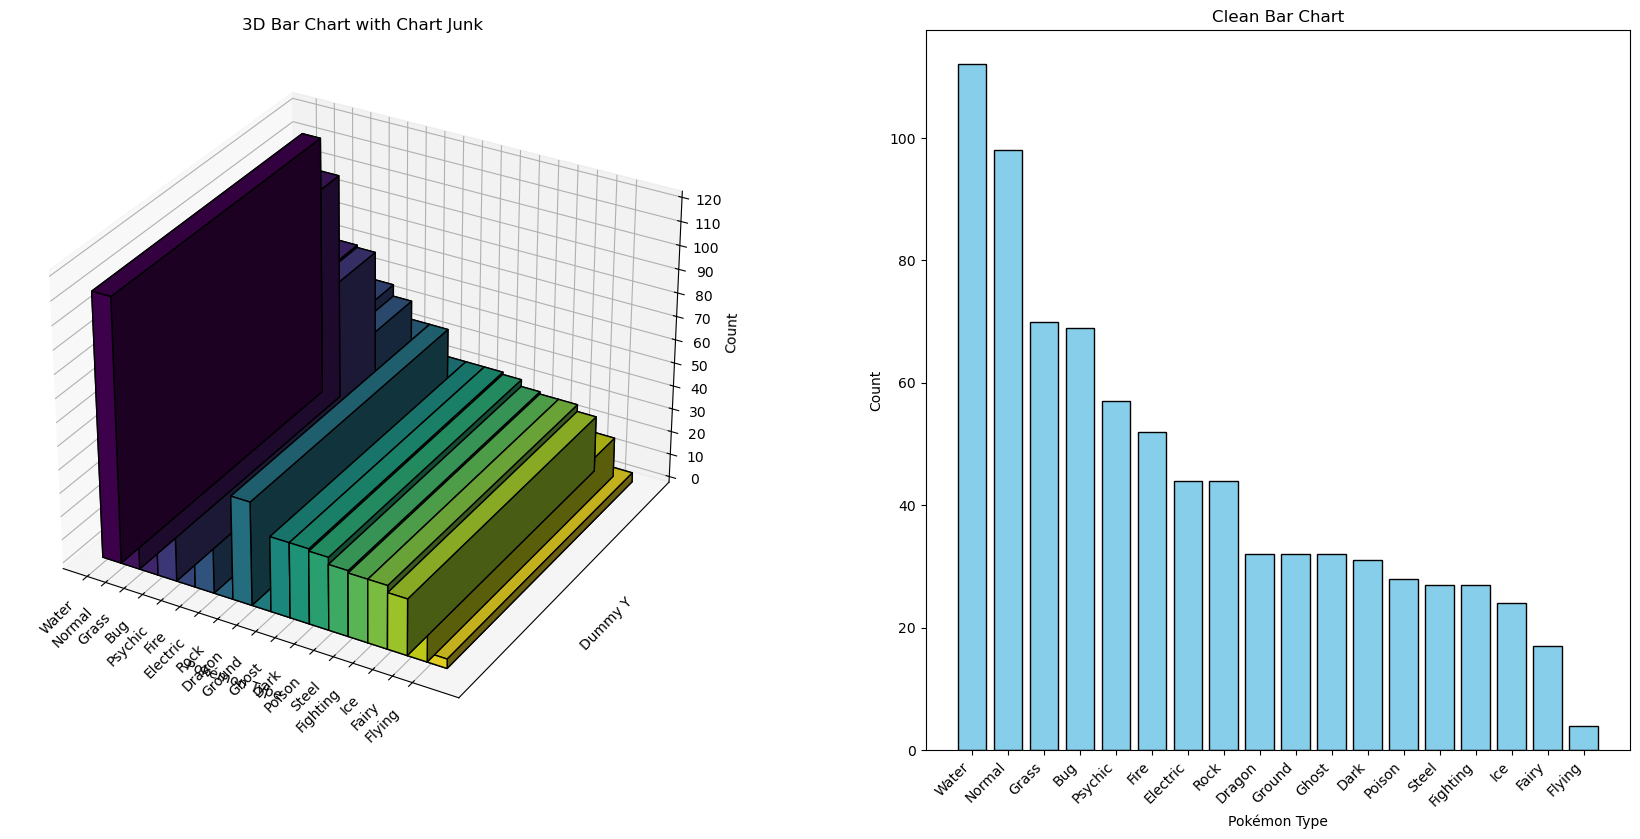

In [142]:
# Aggregate data: count Pokémon by primary type
type_counts = df['Type 1'].value_counts()
# Create a figure with two subplots and increase figure size
fig = plt.figure(figsize=(18, 9))
# 3D Bar Chart with Chart Junk
ax = fig.add_subplot(1, 2, 1, projection='3d')
# Create positions and dimensions for bars
x = np.arange(len(type_counts))
y = np.zeros_like(x)
z = np.zeros_like(x)
dx = np.ones_like(x)  # Width of each bar
dy = np.ones_like(x)  # Depth of each bar
dz = type_counts.values  # Height of each bar
# Define a list of colors for each bar
colors = plt.cm.viridis(np.linspace(0, 1, len(type_counts)))
# Plot 3D bars with different colors
for i in range(len(type_counts)):
    ax.bar3d(x[i], y[i], z[i], dx[i], dy[i], dz[i], color=colors[i], edgecolor='black')

    # Add chart junk
ax.set_title('3D Bar Chart with Chart Junk')
ax.set_xlabel('Pokémon Type')
ax.set_ylabel('Dummy Y')
ax.set_zlabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(type_counts.index, rotation=45, ha='right')
ax.set_yticks([])
ax.set_zticks(np.arange(0, max(dz)+10, 10))
ax.grid(True, linestyle=':', alpha=0.5)  # More pronounced grid lines

#ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))  # Hide x-axis line
#ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))  # Hide y-axis line
#ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))  # Hide z-axis line

# Adjust layout manually
plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1, wspace=0.3)
# Clean Bar Chart
plt.subplot(1, 2, 2)
plt.bar(type_counts.index, type_counts.values, color='skyblue', edgecolor='black')
plt.title('Clean Bar Chart')
plt.xlabel('Pokémon Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
# Adjust layout manually
plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1, wspace=0.3)
plt.show()


 ### Sample manipulated plot
 - not starting at 0 on the y-axis can manipulate

In [143]:
# Aggregate data: count Pokémon by primary type
type_counts = df['Type 1'].value_counts()

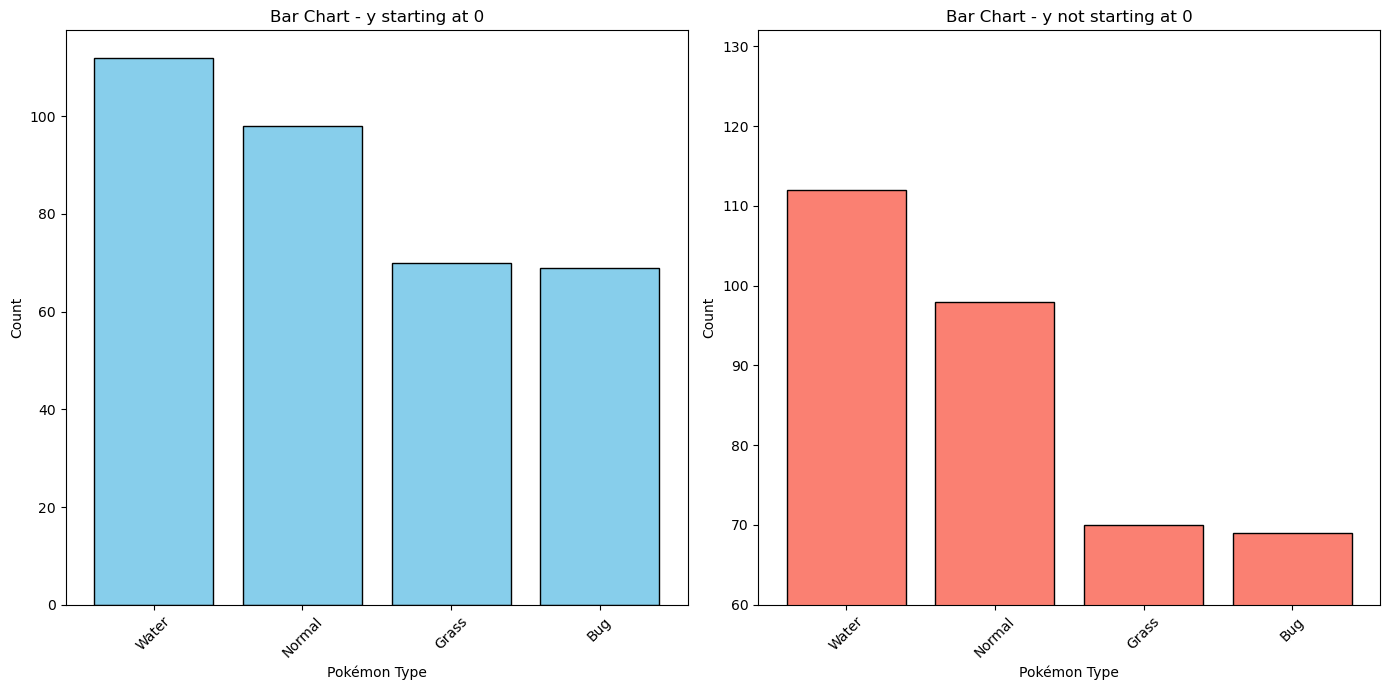

In [144]:
# Select only the top 5 Pokémon types for clarity
top_types = type_counts.head(4)
top_types_names = top_types.index
top_types_values = top_types.values
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Misleading Bar Chart with y-axis manipulated
axes[1].bar(top_types_names, top_types_values, color='salmon', edgecolor='black')
axes[1].set_title('Bar Chart - y not starting at 0')
axes[1].set_xlabel('Pokémon Type')
axes[1].set_ylabel('Count')
axes[1].set_ylim(60, top_types_values.max() + 20)  # Manipulate y-axis to exaggerate differences
axes[1].tick_params(axis='x', rotation=45)
# Accurate Bar Chart with y-axis starting at 0
axes[0].bar(top_types_names, top_types_values, color='skyblue', edgecolor='black')
axes[0].set_title('Bar Chart - y starting at 0')
axes[0].set_xlabel('Pokémon Type')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)
# Adjust layout to fit labels
plt.tight_layout()
plt.show()

In [134]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False



 ## Univariate Exploration of Data
 This refers to the analysis of a single variable (or feature) in a dataset.



### Bar Chart
- always plot starting with 0 on the y-axis to present values in real comparable way.
- sort nominal data
- don't sort ordinal data - here it is more important to know how often the most important category appears than the most frequent
- if you have a lot of categories use a horizontal bar chart: having the categories on the y-axes, to make it better readable.

/var/folders/6_/b_r60fj95lbdy_kbs0j_mhhh0000gn/T/ipykernel_18780/3497730665.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Type 1', palette='viridis')


<Axes: xlabel='Type 1', ylabel='count'>

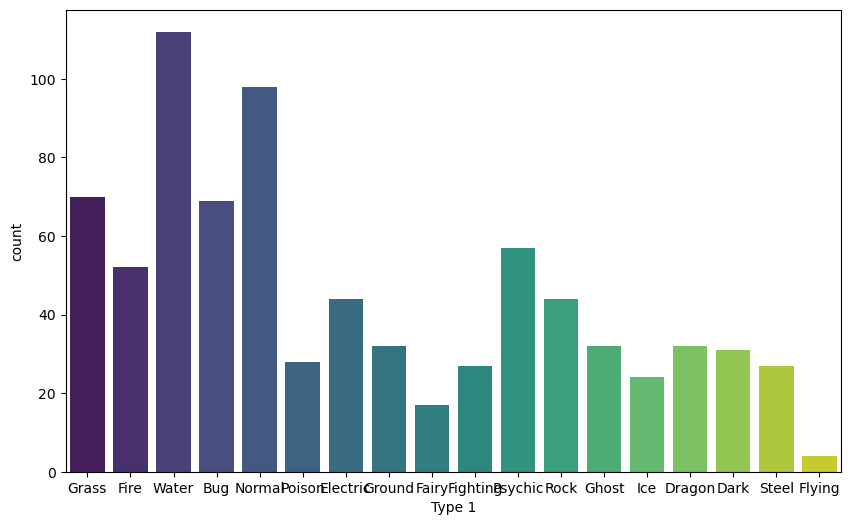

In [145]:
plt.figure(figsize=(10,6))
# because we have categorical (nominal) values, we sort it by count
sns.countplot(data=df, x='Type 1', palette='viridis')
plt.title('Number of Pokémon by Primary Type')
plt.xticks(rotation=45)
plt.show()

#### Ordered bar chart
when we have categorical (nominal) values we order it, to make it better readable

/var/folders/6_/b_r60fj95lbdy_kbs0j_mhhh0000gn/T/ipykernel_18780/2100036032.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Type 1', palette='viridis', order=type_order)


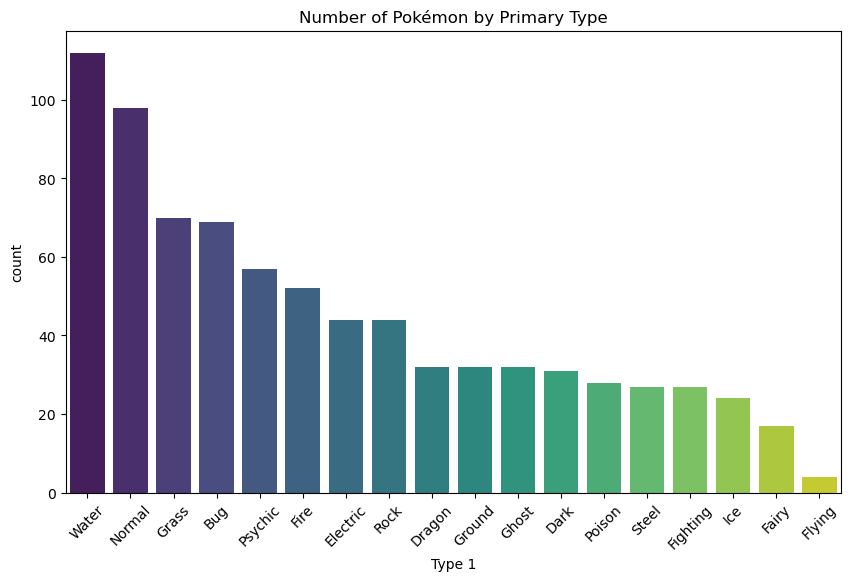

In [147]:
plt.figure(figsize=(10,6))
# because we have categorical (nominal) values, we sort it by count
type_order = df['Type 1'].value_counts().index
sns.countplot(data=df, x='Type 1', palette='viridis', order=type_order)
plt.title('Number of Pokémon by Primary Type')
plt.xticks(rotation=45)
plt.show()


#### Horizontal bar chart

/var/folders/6_/b_r60fj95lbdy_kbs0j_mhhh0000gn/T/ipykernel_18780/1567664635.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Type 1', palette='viridis', order=type_order)


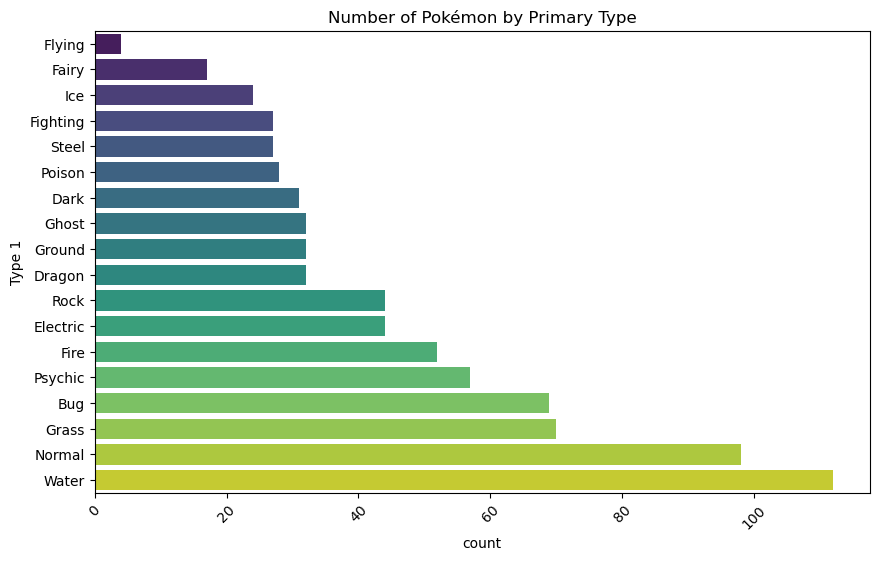

In [150]:
plt.figure(figsize=(10,6))
# because we have categorical (nominal) values, we sort it by count, starting with the most often occuring value
type_order = df['Type 1'].value_counts().index[::-1]
# because we have a lot of categories we make it a horizontal bar chart
sns.countplot(data=df, y='Type 1', palette='viridis', order=type_order)
plt.title('Number of Pokémon by Primary Type')
plt.xticks(rotation=45)
plt.show()


 #### Stacked bar chart
 - each bar represents a total, the different segements within a bar show the contribution of each category

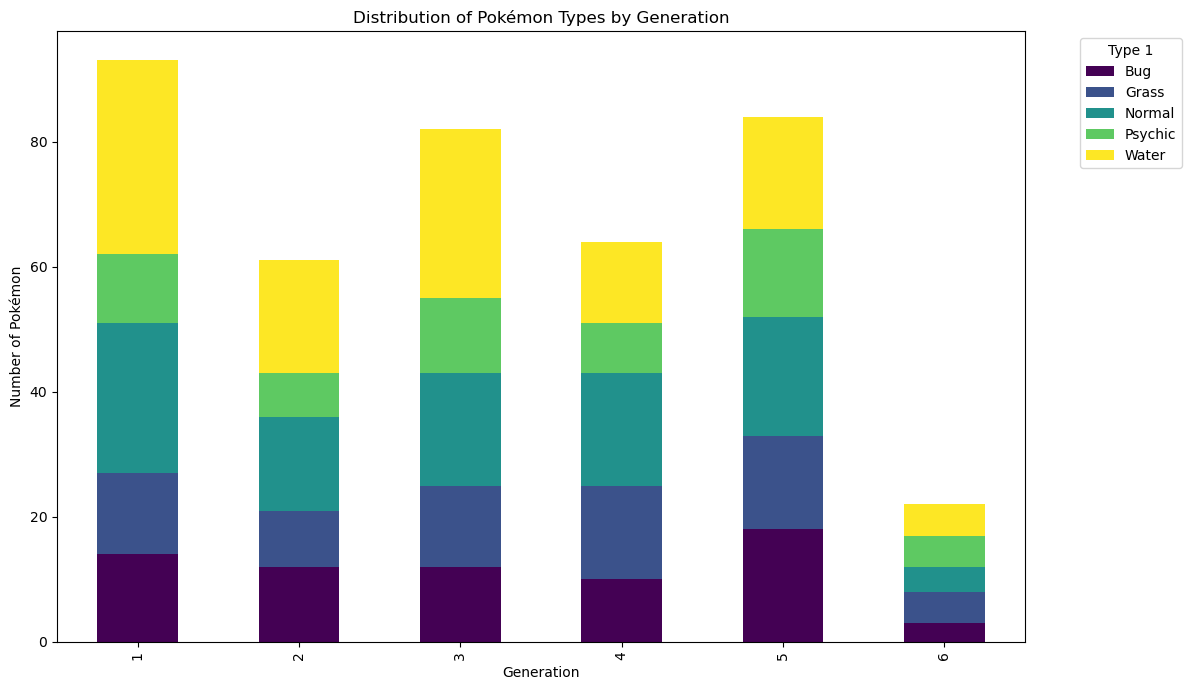

In [151]:
top_primary_types = df['Type 1'].value_counts().nlargest(5).index
filtered_df = df[df['Type 1'].isin(top_primary_types)]
type_counts = filtered_df.groupby(['Generation', 'Type 1']).size().unstack(fill_value=0)
# Plot the stacked bar chart
type_counts.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')
# Add labels and title
plt.title('Distribution of Pokémon Types by Generation')
plt.xlabel('Generation')
plt.ylabel('Number of Pokémon')
plt.legend(title='Type 1', bbox_to_anchor=(1.05, 1), loc='upper left')
# Adjust layout
plt.tight_layout()
plt.show()

 #### Non ordered bar chart
 - ordinal qualitative data

/var/folders/6_/b_r60fj95lbdy_kbs0j_mhhh0000gn/T/ipykernel_18780/317855859.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Speed_tier', palette='viridis')


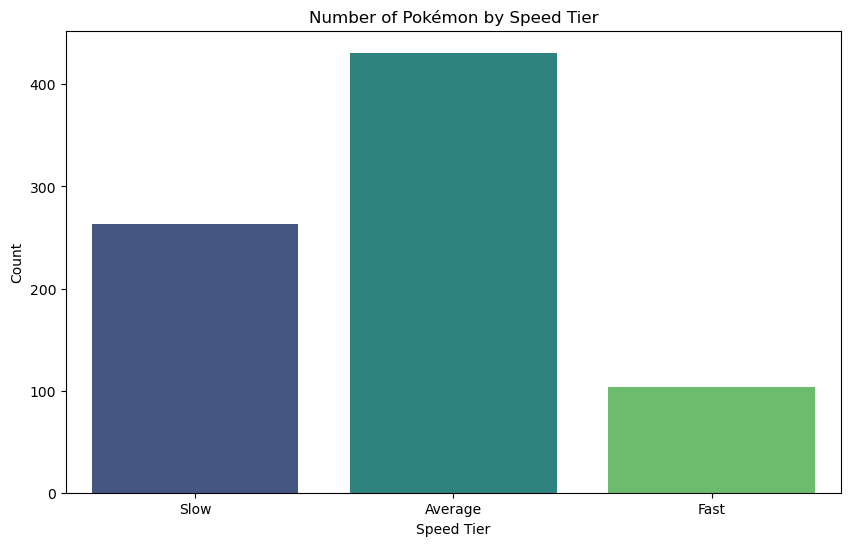

In [152]:
# create ordinal data for the sample
df['Speed_tier'] = pd.cut(df['Speed'], bins=[0, 50, 100, 150], labels=['Slow', 'Average', 'Fast'])
# print(df[['Name', 'Speed', 'Speed_tier']].head())
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Speed_tier', palette='viridis')
plt.title('Number of Pokémon by Speed Tier')
plt.xlabel('Speed Tier')
plt.ylabel('Count')
plt.show()


 ### Histogram
 - quantitative version of a bar chart. This is used to plot numeric values. 
 - values are grouped into continous bins, one bar for each is plotted

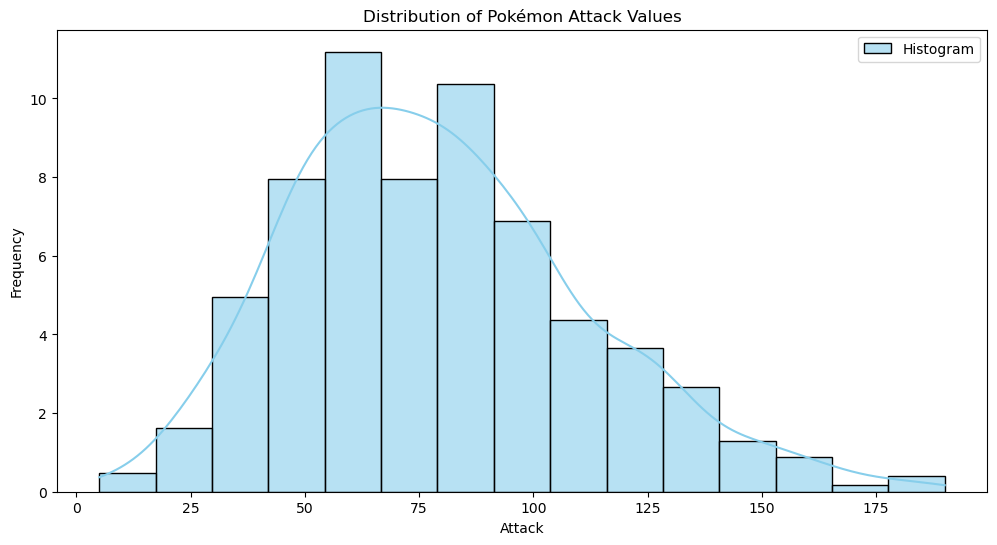

In [153]:
plt.figure(figsize=(12, 6))
# Plot Histogram with KDE
sns.histplot(df['Attack'], bins=15, kde=True, color='skyblue', alpha=0.6, label='Histogram', stat='frequency')
# Add labels and title
plt.title('Distribution of Pokémon Attack Values')
plt.xlabel('Attack')
plt.ylabel('Frequency')
# Add a legend
plt.legend()
plt.show()


 ### KDE - Kernel Density Estimation
 - often a Gaussian or normal distribution, to estimate the density at each point.
 - KDE plots can reveal trends and the shape of the distribution more clearly, especially for data that is not uniformly distributed.

<Axes: xlabel='Attack', ylabel='Density'>

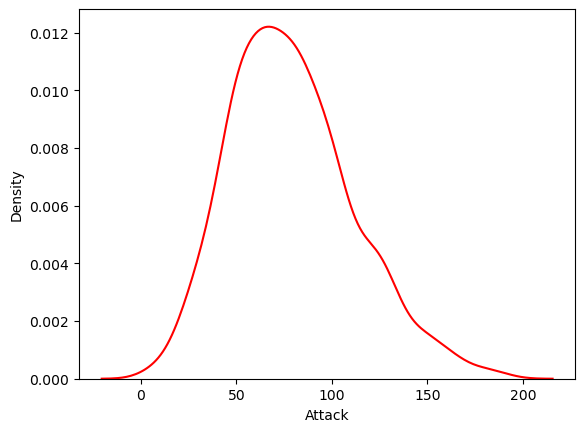

In [154]:
sns.kdeplot(df['Attack'], color='red', label='KDE')


 ### Pie Chart and Donut Plot
 - data needs to be in relative frequencies
 - pie charts work best with 3 slices at maximum. If there are more wedges to display it gets unreadable and the different amounts are hard to compare. Then you would prefer a bar chart.

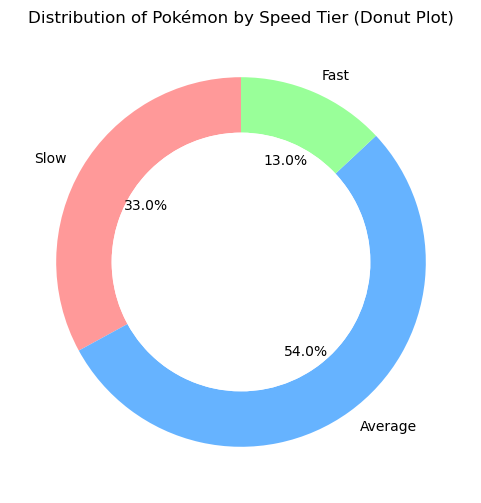

In [155]:
speed_counts = df['Speed_tier'].value_counts()
speed_counts = speed_counts.loc[['Slow', 'Average', 'Fast']]
# Create a Donut Plot
plt.figure(figsize=(6,6))
plt.pie(speed_counts, labels=speed_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3), colors=['#ff9999','#66b3ff','#99ff99'])
# Add a circle in the middle to create the donut hole effect
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)#
plt.title('Distribution of Pokémon by Speed Tier (Donut Plot)')
plt.show()

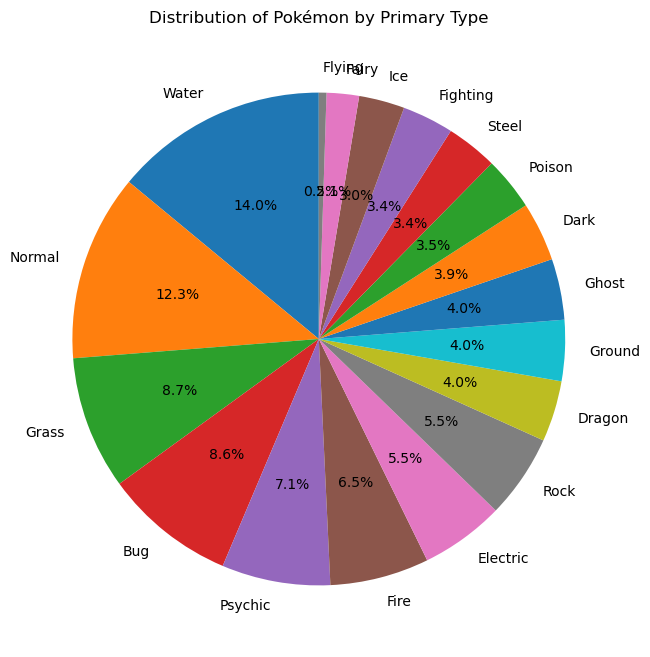

In [156]:
type_counts = df['Type 1'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Pokémon by Primary Type')
plt.show()
# donut plot
# plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))

 ## BiVariate Exploration of Data
 Analyzes the relationship between two variables in a dataset.


 ### Clustered Bar Charts
 - displays the relationship between two categorical values. The bars are organized in clusters based on the level of the first variable.

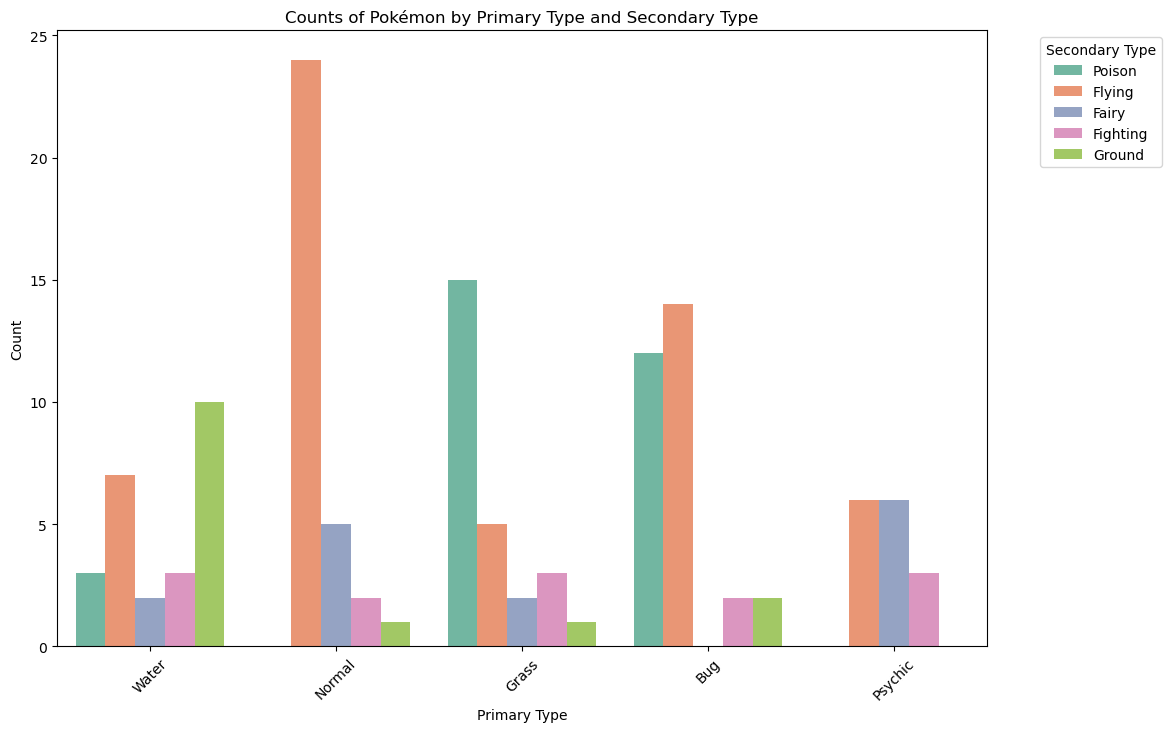

In [157]:
# limit to top 5, for demo
top_primary_types = df['Type 1'].value_counts().nlargest(5).index
filtered_df = df[df['Type 1'].isin(top_primary_types)]
top_secondary_types = filtered_df['Type 2'].value_counts().nlargest(5).index
filtered_df = filtered_df[filtered_df['Type 2'].isin(top_secondary_types)]
plt.figure(figsize=(12, 8))
sns.countplot(data=filtered_df, x='Type 1', hue='Type 2', palette='Set2', order=top_primary_types)
plt.title('Counts of Pokémon by Primary Type and Secondary Type')
plt.xlabel('Primary Type')
plt.ylabel('Count')
plt.legend(title='Secondary Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


 ### Scatterplots
 - each data point is plotted individually as a point, its x-position corresponding to one feature value and its y-position corresponding to the second.
 - if the plot suffers from overplotting (too many datapoints overlap): you can use transparency and jitter (every point is moved slightly from its true value)

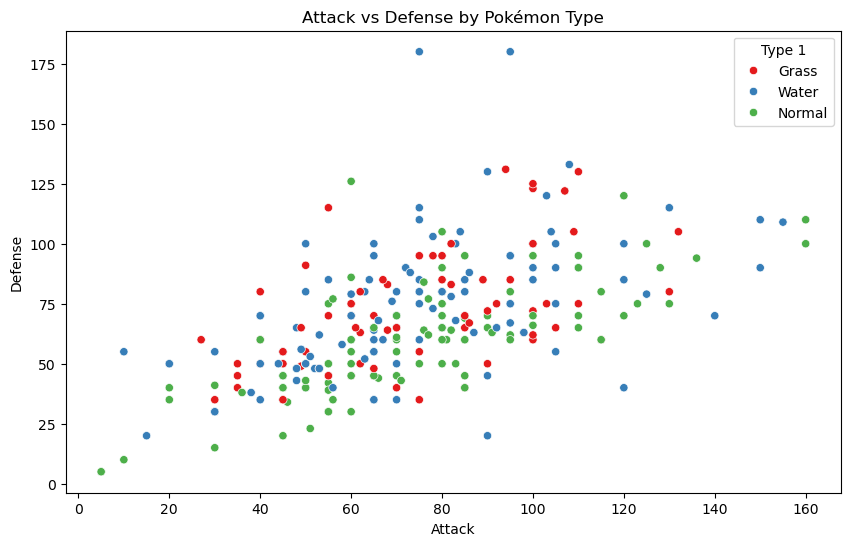

In [158]:
top_primary_types = df['Type 1'].value_counts().nlargest(3).index
filtered_df = df[df['Type 1'].isin(top_primary_types)].copy() 
plt.figure(figsize=(10,6))
sns.scatterplot(data=filtered_df, x='Attack', y='Defense', hue='Type 1', palette='Set1')
plt.title('Attack vs Defense by Pokémon Type')
plt.show()

In [63]:
import numpy as np

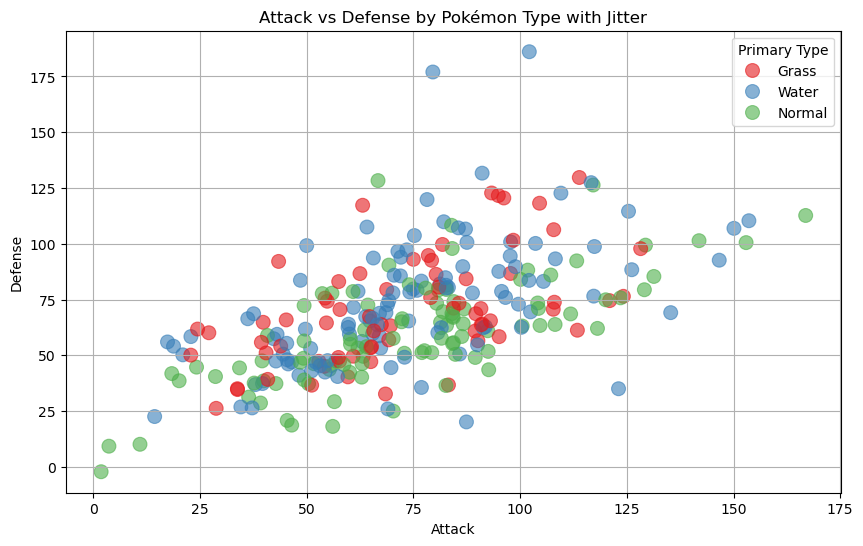

In [159]:
# Get the top 5 primary types based on count
top_primary_types = df['Type 1'].value_counts().nlargest(3).index
filtered_df = df[df['Type 1'].isin(top_primary_types)].copy()  # Use .copy() to avoid warning
# Add jitter to 'Attack' and 'Defense'
filtered_df.loc[:, 'Attack_jitter'] = filtered_df['Attack'] + np.random.normal(scale=5, size=len(filtered_df))
filtered_df.loc[:, 'Defense_jitter'] = filtered_df['Defense'] + np.random.normal(scale=5, size=len(filtered_df))
# Create a scatter plot with jitter and transparency
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=filtered_df, 
    x='Attack_jitter', 
    y='Defense_jitter', 
    hue='Type 1', 
    palette='Set1', 
    alpha=0.6,       # Adjust transparency
    edgecolor=None,  # Remove edge color
    s=100,           # Size of the markers
)

plt.title('Attack vs Defense by Pokémon Type with Jitter')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.legend(title='Primary Type')
plt.grid(True)
plt.show()


 ### Heatmaps
 - 2d version of a Histogram
 - data points are placed with its x-position corresponding to one feature value and its y-position corresponding to the second.
 - the plotting area is divided into a grid, and the numbers of points add up there and the counts are indicated by color

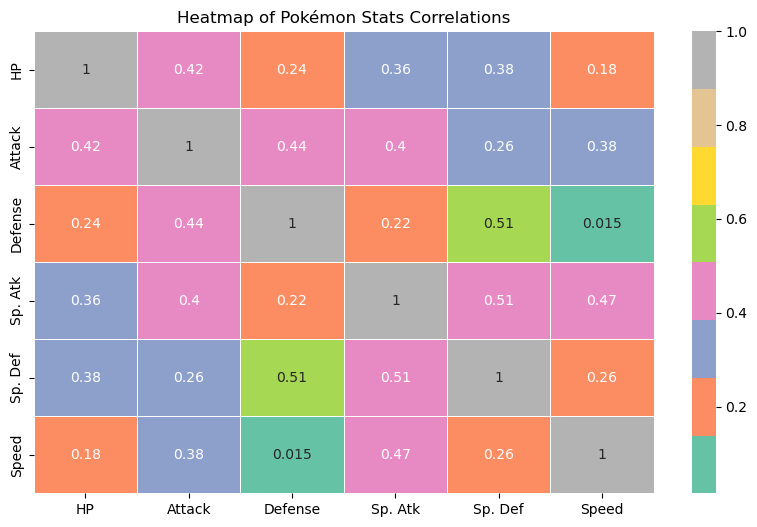

In [160]:
plt.figure(figsize=(10,6))
corr = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].corr()
sns.heatmap(corr, annot=True, cmap='Set2', linewidths=0.5)
plt.title('Heatmap of Pokémon Stats Correlations')
plt.show()

 ### Violin plots
 - show the relationship between quantitative (numerical) and qualitative (categorical) variables on a lower level of absraction.
 - the distribution is plotted like a kernel density estimate, so we can have a clear
 - to display the key statistics at the same time, you can embedd a box plot in a violin plot.

/var/folders/6_/b_r60fj95lbdy_kbs0j_mhhh0000gn/T/ipykernel_18780/1374164214.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_df, x='Type 1', y='Attack', palette='Set3', inner=None)


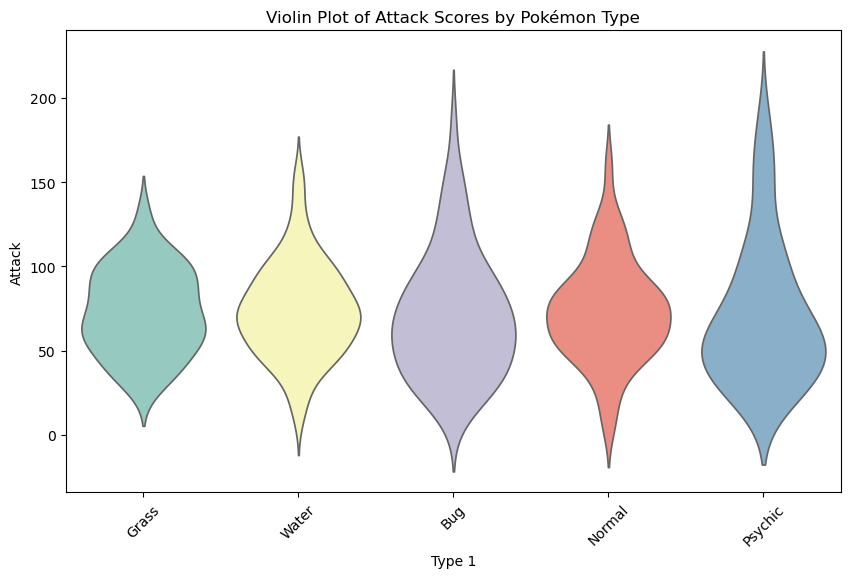

In [161]:
plt.figure(figsize=(10,6))
top_primary_types = df['Type 1'].value_counts().nlargest(5).index
filtered_df = df[df['Type 1'].isin(top_primary_types)]
sns.violinplot(data=filtered_df, x='Type 1', y='Attack', palette='Set3', inner=None)
plt.title('Violin Plot of Attack Scores by Pokémon Type')
plt.xticks(rotation=45)
plt.show()

 ### Box plots
 - it also plots the relationship between quantitative (numerical) and qualitative (categorical) variables on a lower level of absraction.
 - compared to the violin plot, the box plot leans more on the summarization of the data, primarily just reporting a set of descriptive statistics for the numeric values on each categorical level.
 - it visualizes the five-number summary of the data: minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum.

 Key elements of a boxplot:

 **Box**: The central part of the plot represents the interquartile range (IQR), which is the range between the first quartile (Q1, 25th percentile) and the third quartile (Q3, 75th percentile). This contains the middle 50% of the data.

 **Median Line**: Inside the box, a line represents the median (Q2, 50th percentile) of the dataset.

 **Whiskers**: Lines extending from the box, known as "whiskers," show the range of the data that lies within 1.5 times the IQR from Q1 and Q3. They typically extend to the smallest and largest values within this range.

 **Outliers**: Any data points that fall outside 1.5 times the IQR are considered outliers and are often represented by individual dots or marks beyond the whiskers.

/var/folders/6_/b_r60fj95lbdy_kbs0j_mhhh0000gn/T/ipykernel_18780/2782967467.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='Type 1', y='Attack', palette='Set2')


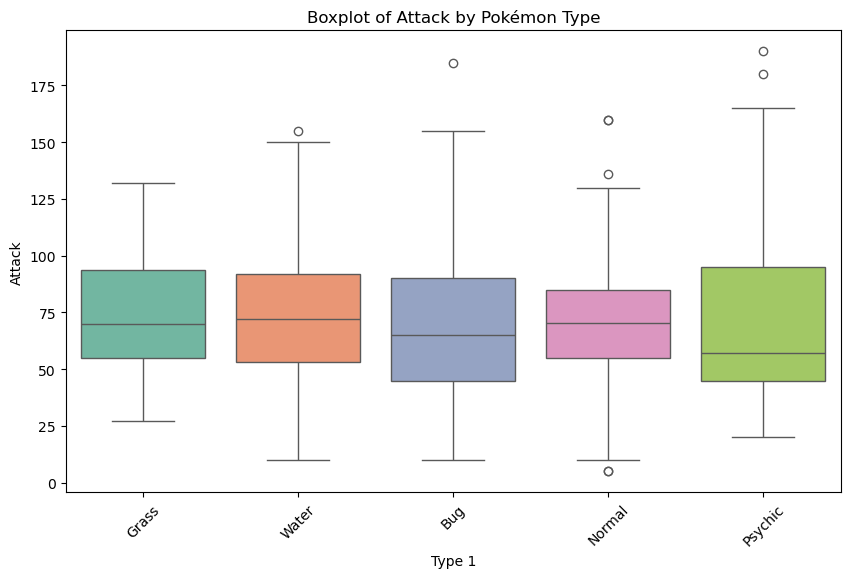

In [162]:
plt.figure(figsize=(10,6))
sns.boxplot(data=filtered_df, x='Type 1', y='Attack', palette='Set2')
plt.title('Boxplot of Attack by Pokémon Type')
plt.xticks(rotation=45)
plt.show()

 ### Combined Violin and Box Plot
 The violin plot shows the density across different categories, and the boxplot provides the summary statistics

/var/folders/6_/b_r60fj95lbdy_kbs0j_mhhh0000gn/T/ipykernel_18780/3624645697.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_df, x='Type 1', y='Attack', palette='Set2', inner=None)  # Create violin plot
/var/folders/6_/b_r60fj95lbdy_kbs0j_mhhh0000gn/T/ipykernel_18780/3624645697.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='Type 1', y='Attack', palette='Set2', width=0.2, fliersize=0, linewidth=1)  # Overlay boxplot


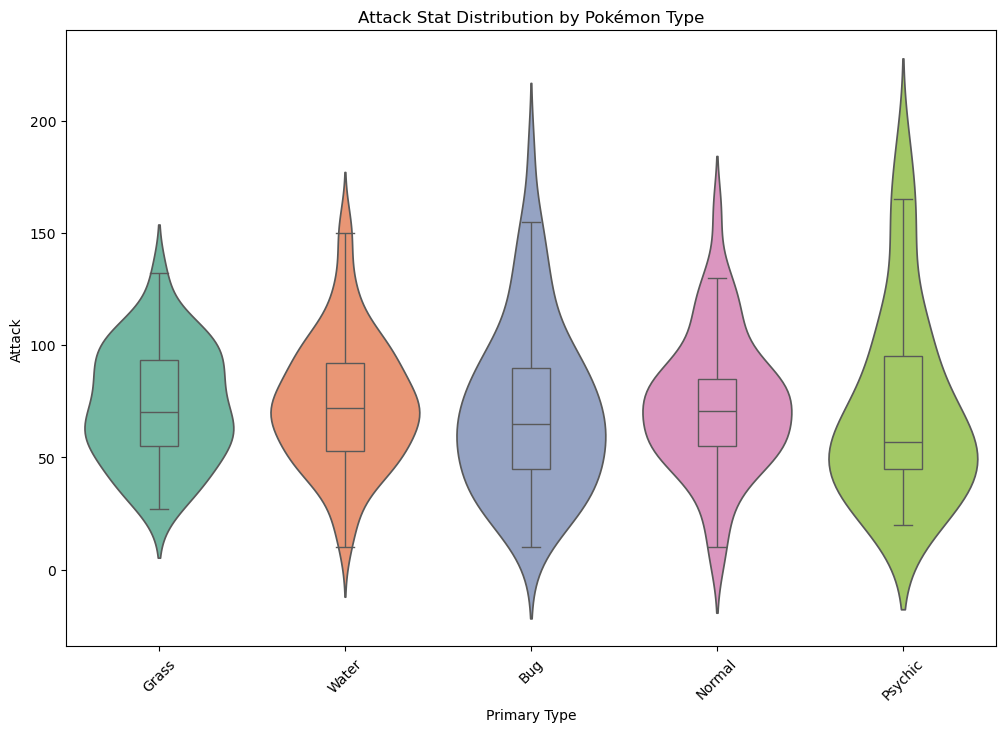

In [163]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=filtered_df, x='Type 1', y='Attack', palette='Set2', inner=None)  # Create violin plot
sns.boxplot(data=filtered_df, x='Type 1', y='Attack', palette='Set2', width=0.2, fliersize=0, linewidth=1)  # Overlay boxplot
plt.title('Attack Stat Distribution by Pokémon Type')
plt.xlabel('Primary Type')
plt.ylabel('Attack')
plt.xticks(rotation=45)
plt.show()

 ### Faceting
 - the data is divided into disjoint subsets, most often by different levels of a categorical variable. For each of these subsets of the data, the same plot type is rendered on other variables, ie more histograms next to each other with different categorical values.

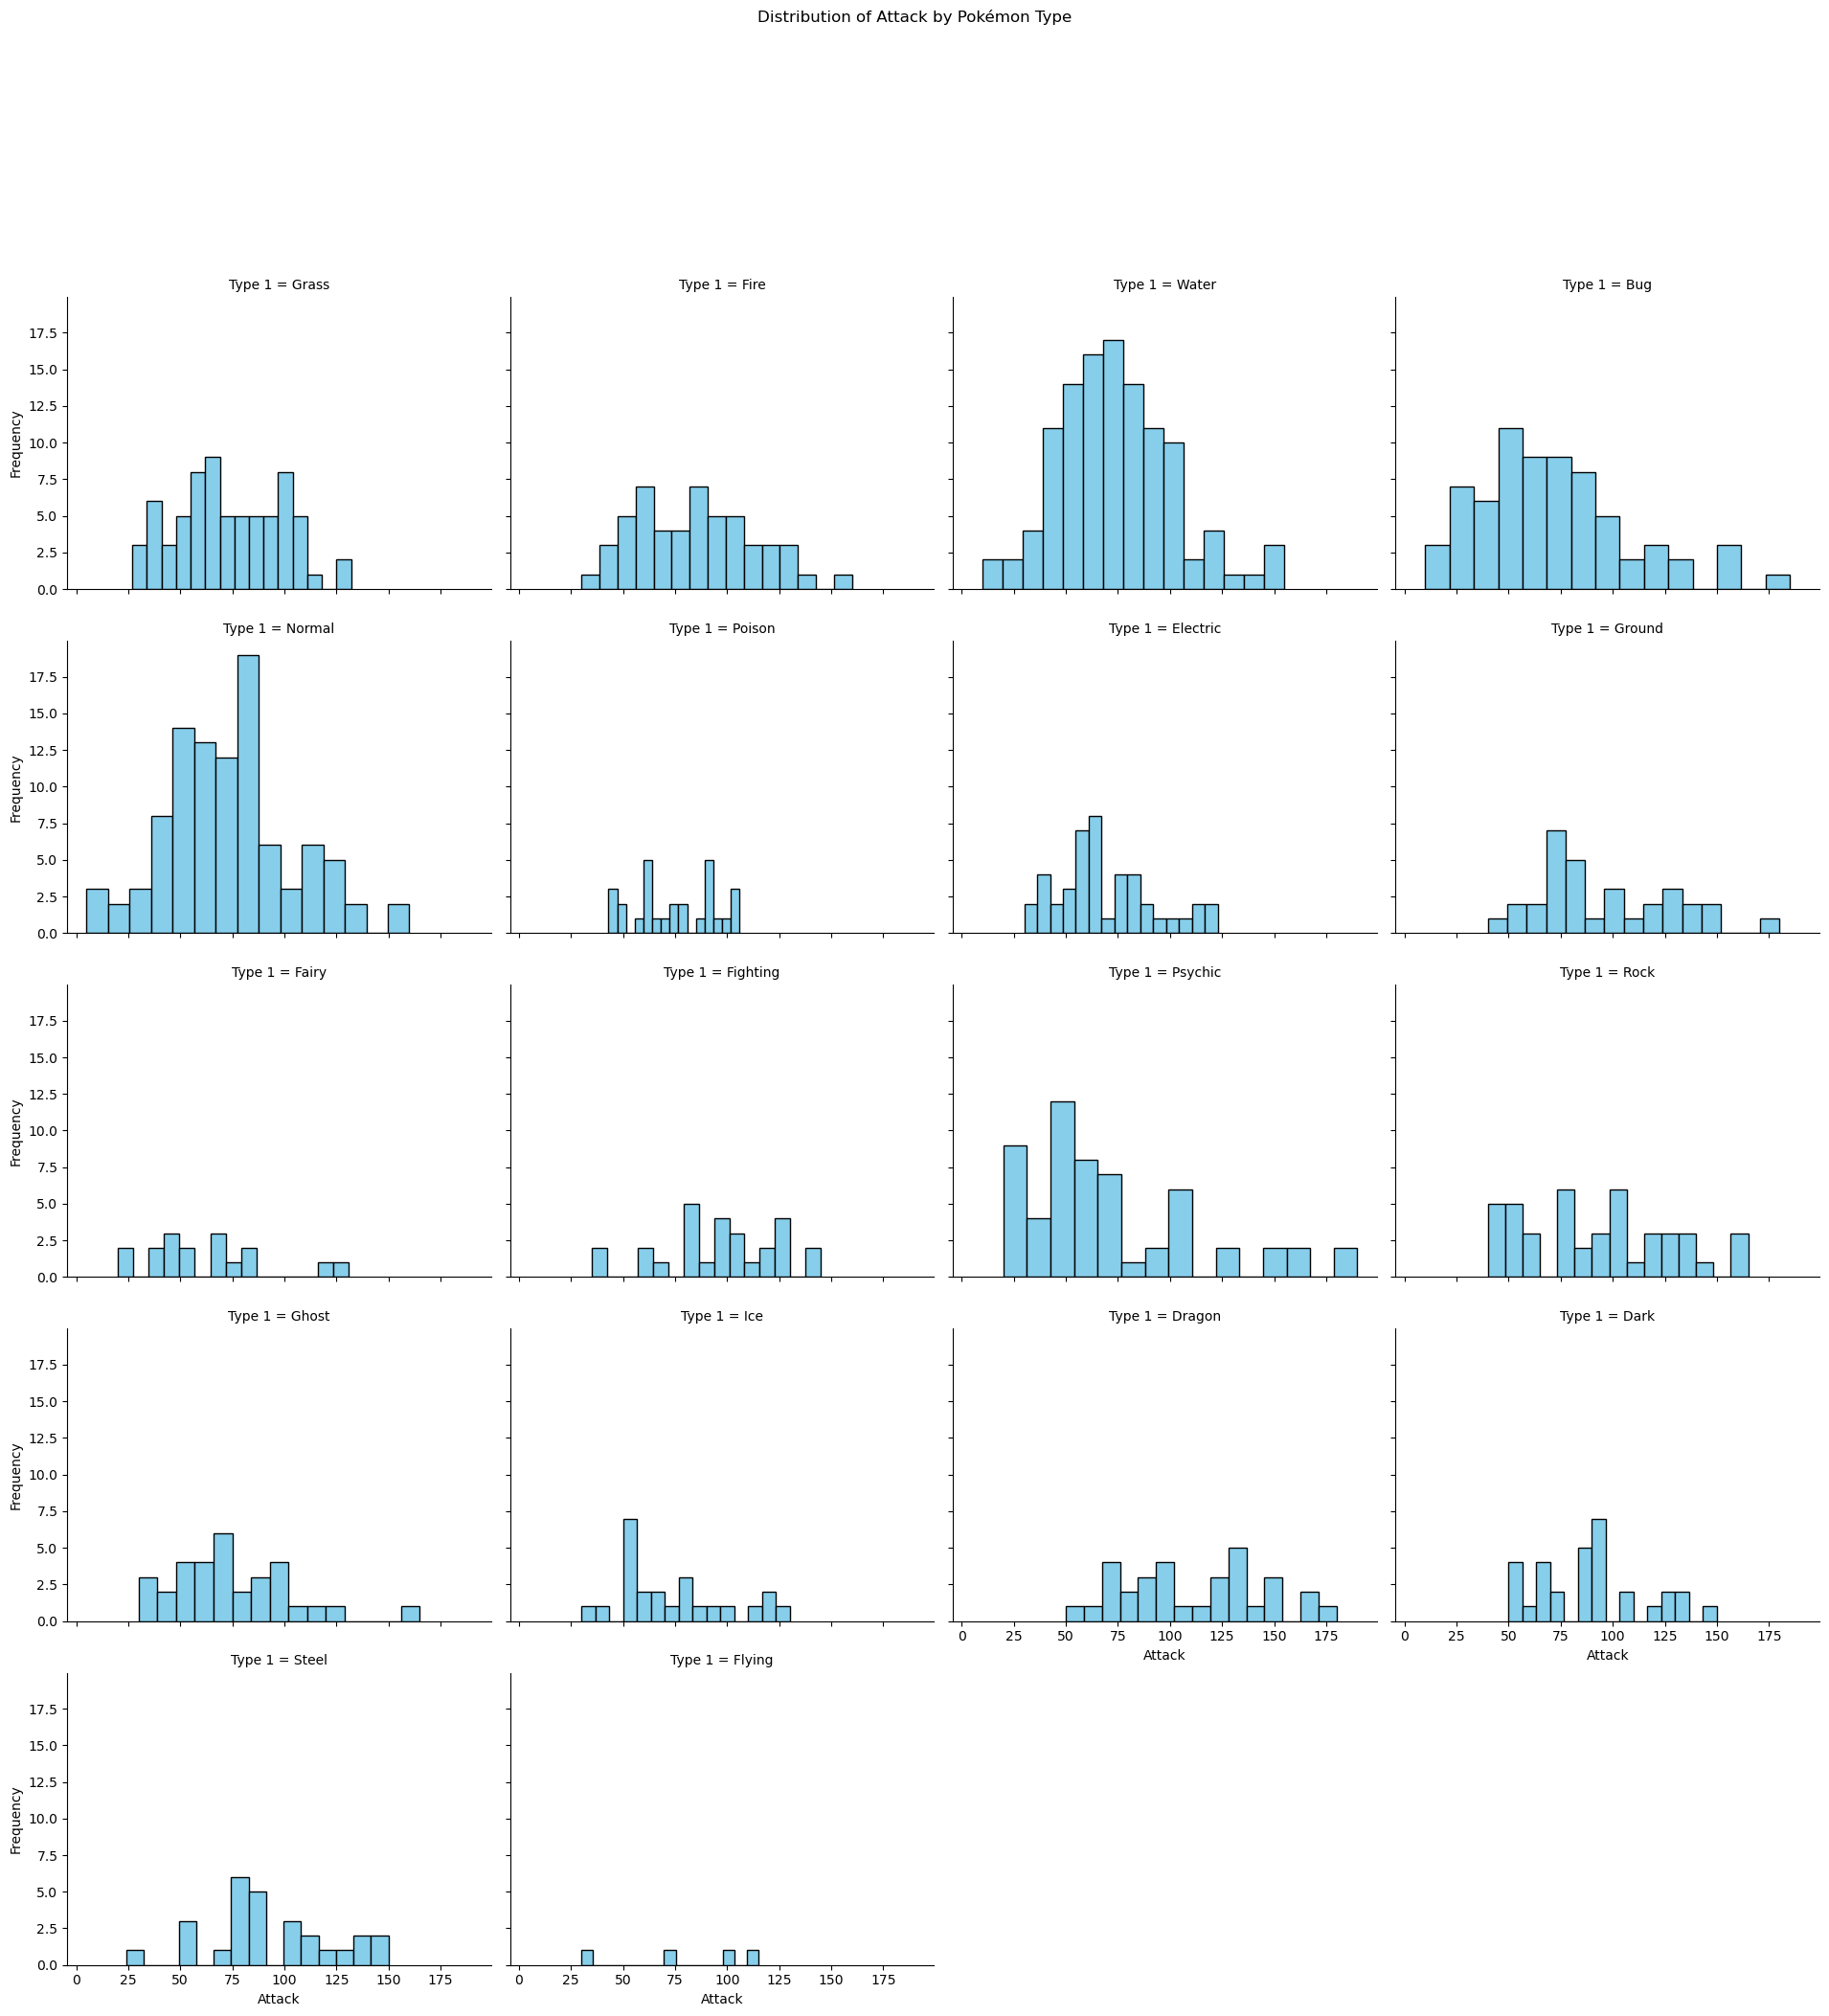

In [164]:
g = sns.FacetGrid(df, col='Type 1', col_wrap=4, height=4, aspect=1.2)
# Map histograms to the grid
g.map(plt.hist, 'Attack', bins=15, color='skyblue', edgecolor='black')
# Adjust titles and labels
g.fig.suptitle('Distribution of Attack by Pokémon Type', y=1.05)
# Add x-axis and y-axis labels to each subplot
for ax in g.axes.flat:
    ax.set_xlabel('Attack')
    ax.set_ylabel('Frequency')
# Adjust layout to make sure labels fit
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust the top space to accommodate the suptitle
plt.show()

 ### Line plot
 - used to plot the trend of one number variable against a seconde variable.

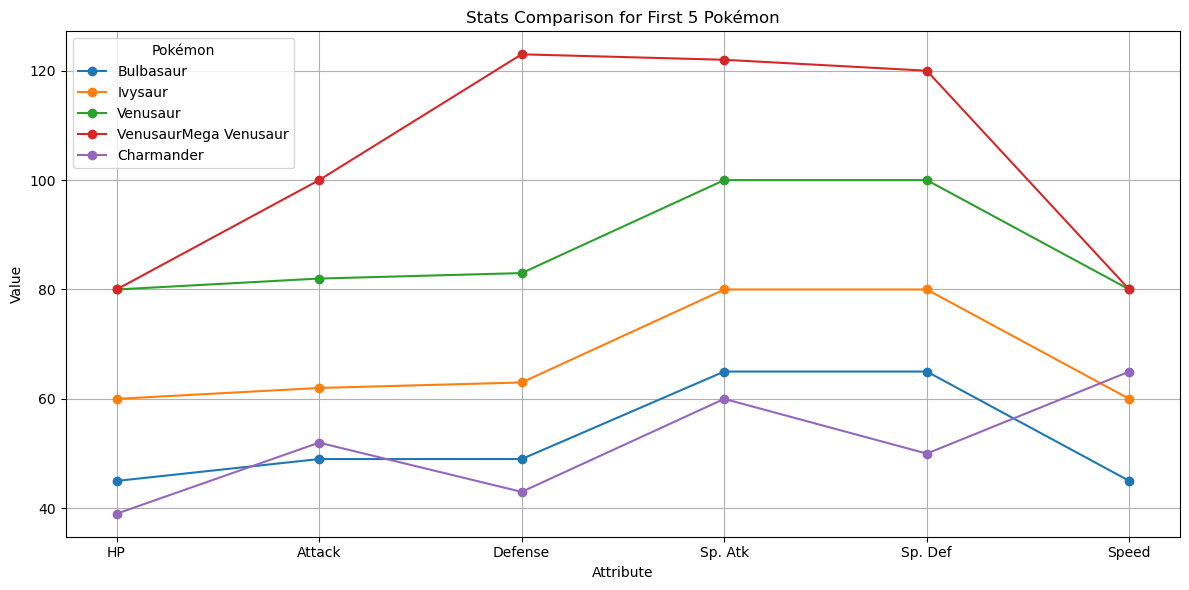

In [166]:
df_first_5 = df.head(5)
# Define the attributes to plot
attributes = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot each Pokémon
for index, row in df_first_5.iterrows():
    pokemon_name = row['Name']
    values = row[attributes]
    plt.plot(attributes, values, marker='o', label=pokemon_name)

# Customize the plot
plt.title('Stats Comparison for First 5 Pokémon')
plt.xlabel('Attribute')
plt.ylabel('Value')
plt.legend(title='Pokémon')
plt.grid(True)
plt.tight_layout()
plt.show()

 ### Quantile-Quantile (Q-Q) plot
 - is a type of plot used to compare the distribution of a dataset with a theoretical distribution (like a normal distribution) or to compare two datasets to check if they follow the same distribution.



In [167]:
import scipy.stats as stats

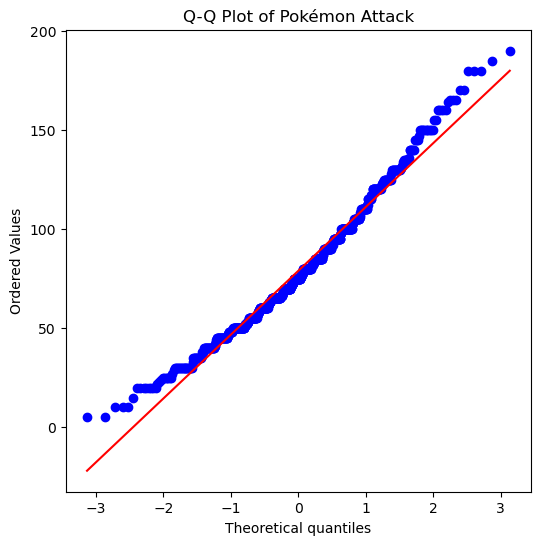

In [168]:
plt.figure(figsize=(6,6))
stats.probplot(df['Attack'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Pokémon Attack')
plt.show()

 ### Swarm plot
 - Like to a scatterplot, each data point is plotted with position according to its value on the two variables being plotted. Instead of randomly jittering points as in a normal scatterplot, points are placed as close to their actual value as possible without allowing any overlap.

/var/folders/6_/b_r60fj95lbdy_kbs0j_mhhh0000gn/T/ipykernel_18780/300329193.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=filtered_df, x='Type 1', y='Attack', palette='Set2')


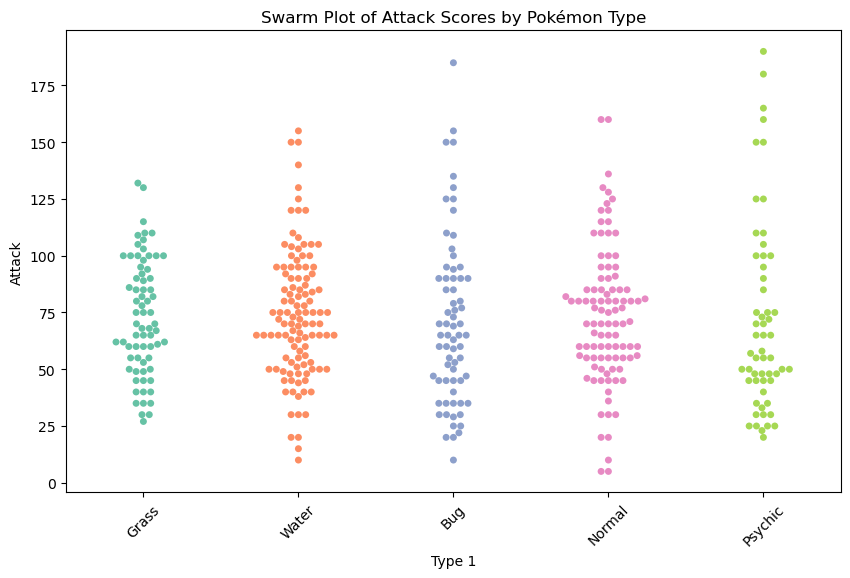

In [169]:
plt.figure(figsize=(10,6))
sns.swarmplot(data=filtered_df, x='Type 1', y='Attack', palette='Set2')
plt.title('Swarm Plot of Attack Scores by Pokémon Type')
plt.xticks(rotation=45)
plt.show()

 ### Strip plot
 - Individual Data Points: Shows each data point along the axis for a categorical variable.
 - same as swmarm plot, but without any dodging or jittering to keep points separate or off the categorical line.

/var/folders/6_/b_r60fj95lbdy_kbs0j_mhhh0000gn/T/ipykernel_18780/3555121917.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=filtered_df, x='Type 1', y='Attack', palette='viridis', size=4, jitter=True)


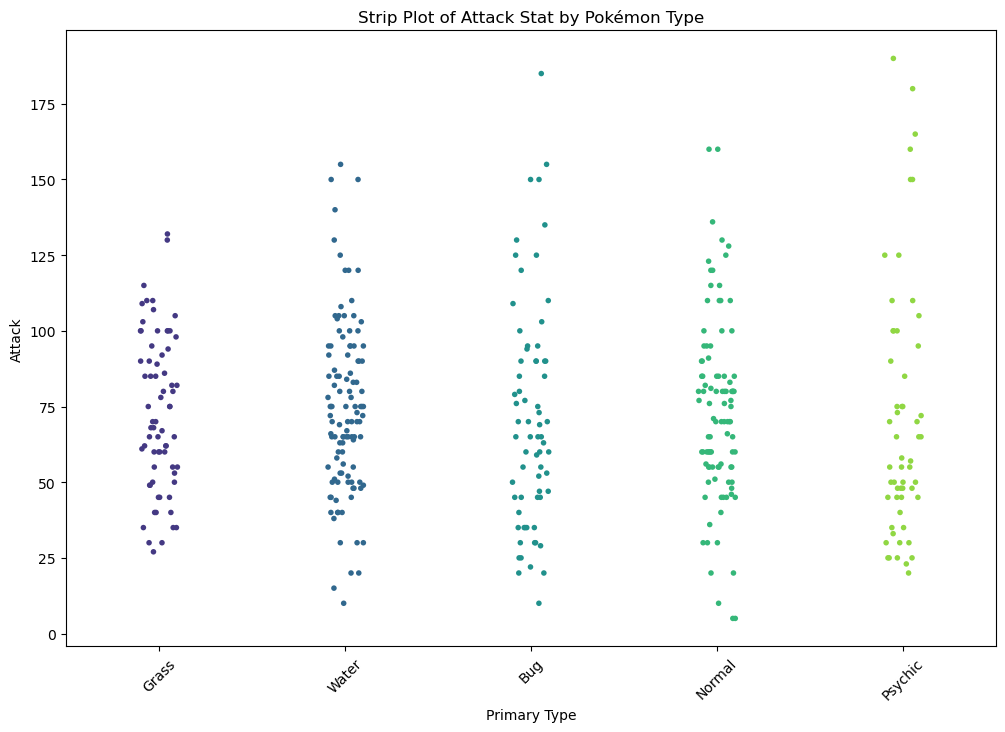

In [170]:
plt.figure(figsize=(12, 8))
sns.stripplot(data=filtered_df, x='Type 1', y='Attack', palette='viridis', size=4, jitter=True)
plt.title('Strip Plot of Attack Stat by Pokémon Type')
plt.xlabel('Primary Type')
plt.ylabel('Attack')
plt.xticks(rotation=45)
plt.show()

 ### Rug plot

 - identify where data points are concentrated along the x-axis.
 - understand the distribution of the data

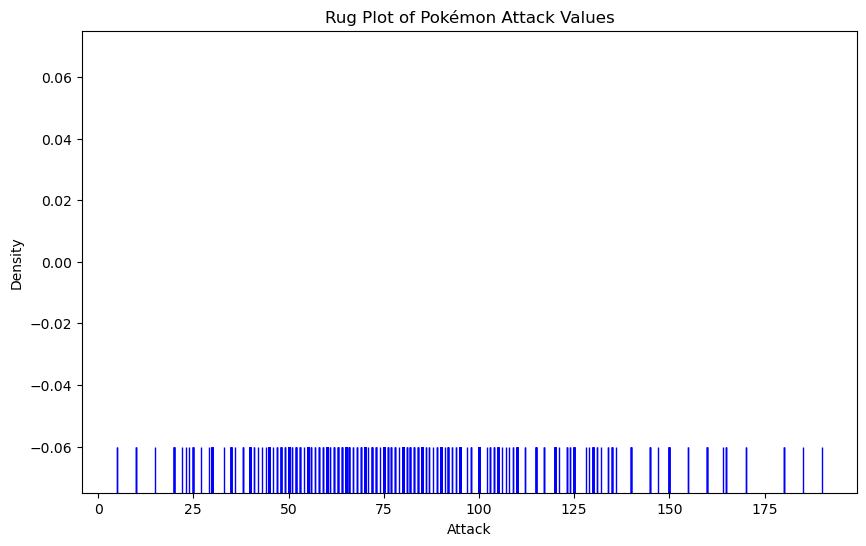

In [171]:
plt.figure(figsize=(10, 6))
sns.rugplot(data=df['Attack'], height=0.1, color='blue')
plt.title('Rug Plot of Pokémon Attack Values')
plt.xlabel('Attack')
plt.ylabel('Density')
plt.show()

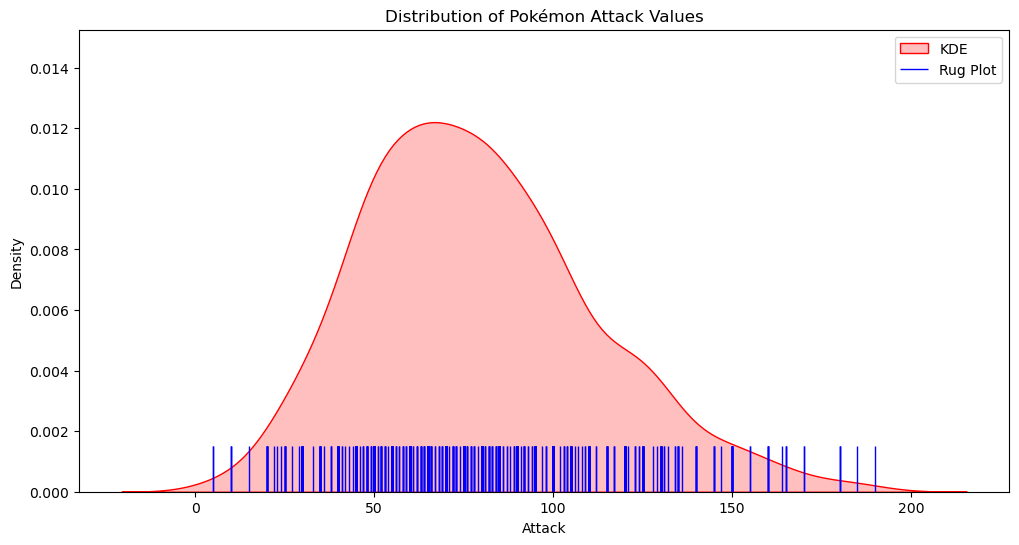

In [176]:
# Select a continuous variable for the plots, e.g., 'Attack'
plt.figure(figsize=(12, 6))
# Plot KDE
sns.kdeplot(df['Attack'], color='red', label='KDE', fill=True)
# Plot Rug
sns.rugplot(df['Attack'], height=0.1, color='blue', label='Rug Plot')
# Add labels and title
plt.title('Distribution of Pokémon Attack Values')
plt.xlabel('Attack')
plt.ylabel('Density')
# Add a legend
plt.legend()
plt.show()

 ### Spider plot

 - compare multiple variables across different categories on a radial grid. Also know as radar chart.


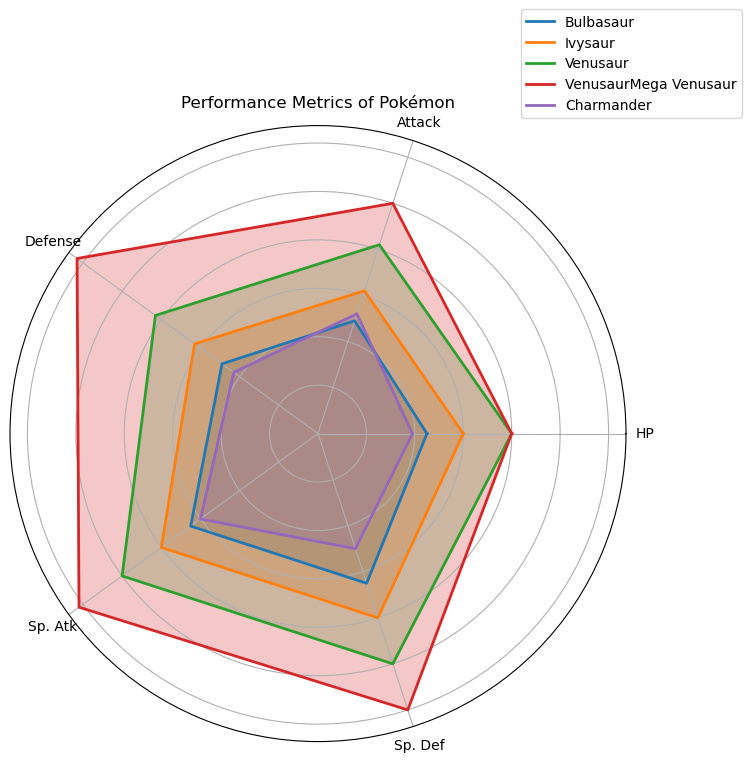

In [177]:
# Select only the first 5 rows
df = df.head(5)
# Get the categories (columns 4 to 9) and number of variables
categories = list(df.columns[5:10])  # Adjust indices if needed
num_vars = len(categories)
# Compute the angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop
# Initialize the spider plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
# Draw one plot per Pokémon
for index, row in df.iterrows():
    values = row[categories].tolist()  # Select the columns for plotting
    values += values[:1]  # Close the loop

    ax.plot(angles, values, label=row['Name'], linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.25)  # Fill the area under the plot
# Labels for the axes
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
# Title and legend
plt.title('Performance Metrics of Pokémon')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.2))
plt.show()


 # Useful links

 ## Libs used for the sample plots:
 - [Matplotlib](https://matplotlib.org/): a versatile library for visualizations, but it can take some code effort to put together common visualizations.
 -  [Seaborn](https://seaborn.pydata.org/): built on top of matplotlib, adds a number of functions to make common statistical visualizations easier to generate.
 - [pandas](https://pandas.pydata.org/): while this library includes some convenient methods for visualizing data that hook into matplotlib, we'll mainly be using it for its main purpose as a general tool for working with data (https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf).


 ## Further reading:
 - Anscombes Quartett: Same stats for the data, but different distribution: https://en.wikipedia.org/wiki/Anscombe%27s_quartet
 - Chartchunk: https://en.wikipedia.org/wiki/Chartjunk
 - Data Ink Ratio: https://infovis-wiki.net/wiki/Data-Ink_Ratio
 - Lie factor: https://infovis-wiki.net/wiki/Lie_Factor
 - Tidy data: https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html
 - Colorblind-friendly visualizations: https://www.tableau.com/blog/examining-data-viz-rules-dont-use-red-green-together